<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/practice6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist # data 불러오기(손 글씨 숫자 데이터넷)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
#data 잘 불러왔는지 확인

3


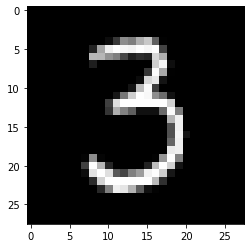

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
#셀 안에 그림 그리는 조건

index= 50 #index설정에 따라 원하는 data를 골라서 그릴 수 있다.
img = x_train[index]
print(y_train[index])
plt.imshow(img, cmap='gray')

In [7]:
#1) 형변환 (astype)

In [8]:
x_train = x_train.astype('float32') #32bit 실수형 / np.ndarray.astype은 numpy에 검색하면 형 변환 해주는 함수
x_test = x_test.astype('float32')

In [9]:
#2) normalize
x_train /= 255
x_test /= 255
#flatten 전
x_train.shape

(60000, 28, 28)

In [10]:
#3)flatten
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [11]:
x_train.shape

(60000, 784)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
#4) one-hot encoding

#아직하지 않기.

## **4.모델만들기**

1> 첫 번째 layer는 input_dim(feature 개수)을 설정해야 한다.

2> 마지막 layer는 우리가 진행하는 일이 regression, binary, multiclass이냐에 따라 다르게 설정한다.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense


In [15]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation='relu')) #input_dim 대신에 input_shape사용가능
model.add(Dense(17, 'relu'))
model.add(Dense(units= 10, activation='softmax')) #마지막 layer는 multiclass여서 activation을 softmax

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 17)                1105      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                180       
Total params: 51,525
Trainable params: 51,525
Non-trainable params: 0
_________________________________________________________________


5.모델의 학습과정 설정

In [17]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

6.모델학습

In [18]:
#fit

In [19]:
history = model.fit(x_train, y_train, validation_split=1/6, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3310 - accuracy: 0.9047 - val_loss: 0.1735 - val_accuracy: 0.9539
Epoch 2/5
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1593 - accuracy: 0.9525 - val_loss: 0.1405 - val_accuracy: 0.9596
Epoch 3/5
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1146 - accuracy: 0.9654 - val_loss: 0.1119 - val_accuracy: 0.9676
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0914 - accuracy: 0.9727 - val_loss: 0.1162 - val_accuracy: 0.9660
Epoch 5/5
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0742 - accuracy: 0.9768 - val_loss: 0.1095 - val_accuracy: 0.9676


In [20]:
#history
#1. model.fit의 return값
#2. train 과정에서 일어나는 현상들을 기록

In [21]:
history.history['loss']

[0.33100461959838867,
 0.15927942097187042,
 0.11461985111236572,
 0.09144673496484756,
 0.07423920929431915]

In [22]:
vars(history) #vars:python내장함수, 해당객체의 모듈,클래스, 인스턴스의 값을 넘긴다.


{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0, 1, 2, 3, 4],
 'history': {'accuracy': [0.9047200083732605,
   0.9525200128555298,
   0.965399980545044,
   0.9726999998092651,
   0.9768199920654297],
  'loss': [0.33100461959838867,
   0.15927942097187042,
   0.11461985111236572,
   0.09144673496484756,
   0.07423920929431915],
  'val_accuracy': [0.9538999795913696,
   0.9595999717712402,
   0.9675999879837036,
   0.9660000205039978,
   0.9675999879837036],
  'val_loss': [0.1734805703163147,
   0.1404874473810196,
   0.11187492311000824,
   0.11619505286216736,
   0.10945229232311249]},
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbe0c0b0d68>,
 'params': {'epochs': 5, 'steps': 1563, 'verbose': 1},
 'validation_data': None}

In [24]:
class FourCal:
  def __init__(self, first, second):
    self.first = first
    self.second = second
  a=1

  def setdata(self, first, second):
    self.first = first
    self.second = second
  def add(self):
    result= self.first + self.second
    return result
  def mul(self):
    result = self.first * self.second
    return result
  def sub(self):
    result = self.first - self.second
    return result
  def div(self):
    result = self.first / self.second
    return result


In [25]:
vars(FourCal)

mappingproxy({'__dict__': <attribute '__dict__' of 'FourCal' objects>,
              '__doc__': None,
              '__init__': <function __main__.FourCal.__init__>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'FourCal' objects>,
              'a': 1,
              'add': <function __main__.FourCal.add>,
              'div': <function __main__.FourCal.div>,
              'mul': <function __main__.FourCal.mul>,
              'setdata': <function __main__.FourCal.setdata>,
              'sub': <function __main__.FourCal.sub>})

In [26]:
# add메서드의 단점
history = model.fit(x_train, y_train, validation_split=1/6, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0632 - accuracy: 0.9802 - val_loss: 0.1003 - val_accuracy: 0.9724
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0942 - val_accuracy: 0.9730
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.1087 - val_accuracy: 0.9701
Epoch 4/5
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.1081 - val_accuracy: 0.9714
Epoch 5/5
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.1170 - val_accuracy: 0.9706


In [27]:
#fit을 연달아 하면(epoch 5회) >> 이미 5회 학습된 상태에서 5회 추가로 학습하는 것이기 때문에 >> 총 epoch가 10인 상황

In [ ]:
#하지만 다른 epoch으로 처음부터 다시하고 싶은데
#1)'del model'을 하